In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('./data.csv')

df.head()

,Id,Height,Weight,Gender
0,1,170,68,male
1,2,130,66,female
2,3,180,71,male
3,4,190,73,male
4,5,160,70,female


f:\Anaconda\envs\pythonProject3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Anaconda\envs\pythonProject3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Anaconda\envs\pythonProject3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Anaconda\envs\pythonProject3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

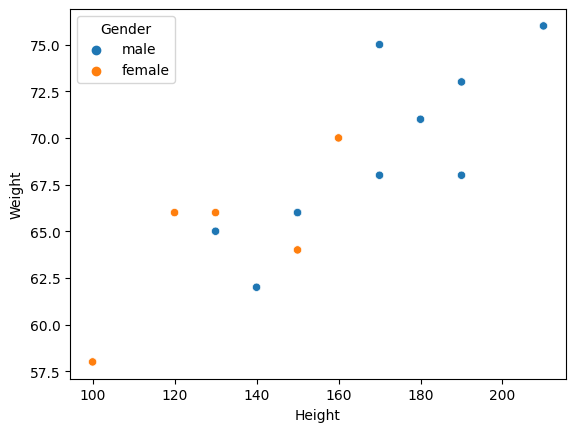

In [3]:
def show_scatterplot(x, y,hue):
    sns.scatterplot(x=x, y=y, hue=hue,data=df)
    plt.show()

show_scatterplot('Height','Weight','Gender')

In [4]:
# 只取已标记性别的样本（训练集）
df_labeled = df.dropna(subset=['Gender'])

# 创建特征矩阵和标签数组
X = df_labeled[['Height', 'Weight']].values
y = df_labeled['Gender'].map({'male': 1, 'female': -1}).values

# 添加一列1以便进行线性分类（y = wx + b, 这里b是w的最后一个元素）
X = np.hstack([X, np.ones((X.shape[0], 1))])

这行代码将一个全为1的列向量添加到数组 `X` 的末尾。假设 `X` 原本是一个 $ N \times M $ 的矩阵 N 行 M 列），新的 `X` 将会是一个 $ N \times (M+1) $ 的矩阵，其中最后一列全为1。这常用于添加一个偏置项（bias term）到特征矩阵中，以便能够用线性方程 $ y = wx + b $ 进行模型拟合，其中 $ b $ 是偏置项，通过这个全为1的列得到。

In [5]:
# 使用最小二乘法来找到分类器的权重
w = np.linalg.inv(X.T @ X) @ X.T @ y

这一行代码使用最小二乘法来找到线性分类器的权重向量 $ \mathbf{w} $。

代码段 `w = np.linalg.inv(X.T @ X) @ X.T @ y` 可以分解为以下几个部分：

1. $ \mathbf{X}^T \mathbf{X} $：这部分计算特征矩阵 $ \mathbf{X} $ 的转置（$ \mathbf{X}^T $）与它自己的乘积。这是一个常见的步骤，在最小二乘法中经常会用到。

2. $ \mathbf{X}^T \mathbf{y} $：这部分计算特征矩阵 $ \mathbf{X} $ 的转置与目标向量 $ \mathbf{y} $ 的乘积。

3. $ (\mathbf{X}^T \mathbf{X})^{-1} $：这部分是求解上述矩阵乘积的逆矩阵。

4. $ (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y} $：这最终的乘积就是权重向量 $ \mathbf{w} $，它最小化了平方误差 $ \left\| \mathbf{X} \mathbf{w} - \mathbf{y} \right\|^2 $。

整个表达式 $ \mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y} $ 是最小二乘法的封闭形式解。这意味着，通过直接求解这个表达式，我们能够得到最小化误差函数的权重向量 $ \mathbf{w} $。

这里简单使用的最小二乘法并没有考虑数据是否是线性可分的。随着后续学习应该会使用更复杂的方法（例如SVM、随机梯度下降等）来找到更好的分类边界。

f:\Anaconda\envs\pythonProject3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Anaconda\envs\pythonProject3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Anaconda\envs\pythonProject3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Anaconda\envs\pythonProject3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

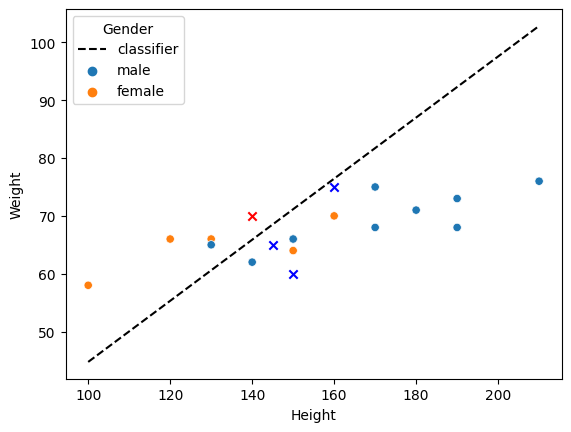

In [6]:
# 计算直线的两个端点
x1 = np.min(X[:, 0])
y1 = -(w[0] * x1 + w[2]) / w[1]
x2 = np.max(X[:, 0])
y2 = -(w[0] * x2 + w[2]) / w[1]

# 获取Gender为空的行并进行预测（预测集）
df_to_predict = df[df['Gender'].isna()]
to_predict = df_to_predict[['Height', 'Weight']].values
predicted_labels = np.sign(to_predict @ w[:2] + w[2])


plt.plot([x1, x2], [y1, y2], 'k--', label='classifier')
plt.legend()
# 在图中标记预测点
for x, y, label in zip(to_predict[:, 0], to_predict[:, 1], predicted_labels):
    plt.scatter(x, y, c='blue' if label == 1 else 'red', marker='x' if label == 1 else 'x')
    
show_scatterplot('Height', 'Weight', 'Gender')

plt.show()

通过简单分类器得到结果：
|Id| Height | Weight |Gender |
|---|---|---|---|
|16|140|70|female|
|17|150|60|male|
|18|145|65|male|
|19|160|75|male|

评价指标：
$$Accuracy = \frac{分类正确的样本数}{总样本数}= \frac{12}{15}= 80\%$$